# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *K*

**Names:**

* *Robin Lang*
* *Kim Lan Phan Hoang*
* *Julien Harbulot*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# bigger plots
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'

---

## 2.1 Exploration of real networks

#### Exercise 2.1

$1.$ **Load the graph as an edgelist**

In [3]:
G_n1 = nx.read_edgelist('../data/network1.csv', delimiter=',', nodetype=int, encoding="utf-8")

$2.$ **Compute the number of nodes and enges**

In [4]:
num_nodes1 = nx.number_of_nodes(G_n1)
print("# Nodes: ", num_nodes1)

num_edges1 = nx.number_of_edges(G_n1)
print("# Edges: ", num_edges1)

# Nodes:  13033
# Edges:  18584


### Exercise 2.2:  Node degree distribution

$1.$ **What kind of plot do you think is useful for this task?**
- to plot a distribution, histograms are a good choice

$2.$ **Can you list some of the properties of the degree distribution?**
- this distribution is highly right-skewed (I had to plot the log to see anything)
- this distribution seems to follow a power-law
- both those properties are generally verified by social graphs

$3.$ **Is it close to a well-known probability distribution? If so, provide an estimation of its
parameter(s)?**

- this distribution seems close to a power-law distibution $P(k) = k^{−\gamma}$ where $l$ is a constant. We estimate $\gamma = 2.1$

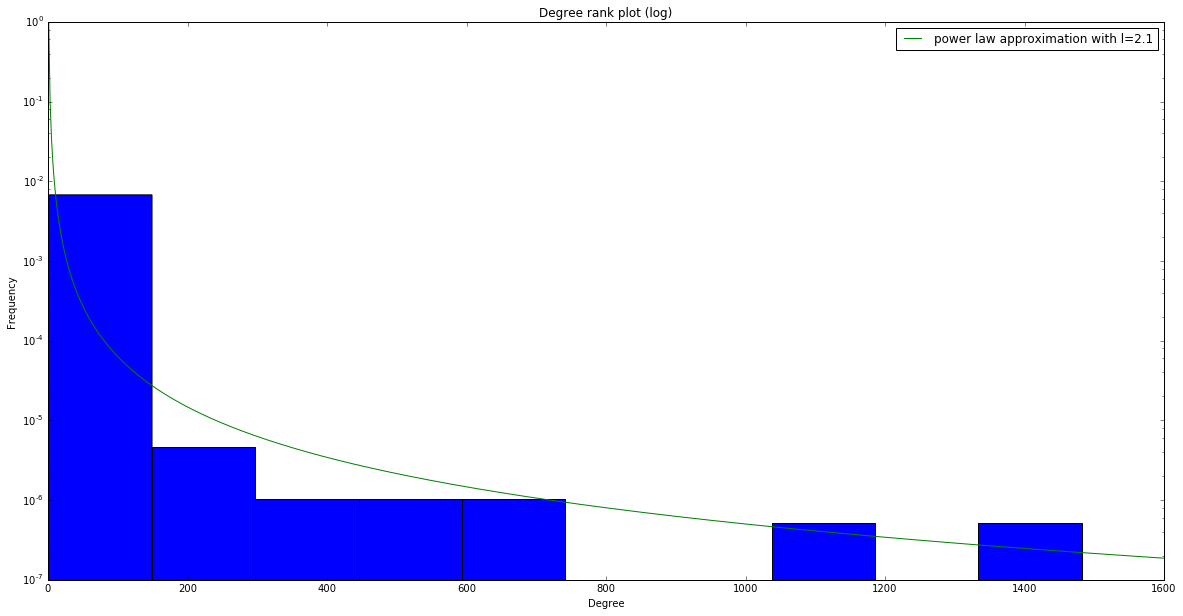

In [5]:
d = list(nx.degree(G_n1).values())
plt.hist(d, log=True, normed=True)
plt.title("Degree rank plot (log)")
plt.ylabel("Frequency")
plt.xlabel("Degree")

X = np.arange(1, 1600, 2)
plt.plot(X, (1/X)**2.1, label="power law approximation with l=2.1")
plt.legend(loc='upper right', frameon=True)
plt.show()

#### Exercise 2.3: Giant component

In [6]:
num_conn_comp1 = nx.number_connected_components(G_n1)
print("1. Number of connected Components: ", num_conn_comp1)

max = 0
biggest_component1 = []
for i in nx.connected_components(G_n1):
    if(len(i) > max): 
        max = len(i)
        biggest_component1 = i

print("2. Size of biggest connected component: ", len(biggest_component1))
print("   Size of graph: ", num_nodes1)

1. Number of connected Components:  192
2. Size of biggest connected component:  12576
   Size of graph:  13033


$2.$ There is a giant Component. Indeed, there are 13'033 nodes in the graph and this biggest component contains 12'576 of them, which is a significant fraction. Computation in the cell below.

#### Exercise 2.4: Short paths & Small-worlds

As shown in the shortest path length distribution below, nodes in this graph as separated by an average of 4 degree of separation. This graph is thus a small world.

computing shortest paths (this takes time)...
aggrgating lengthes...
computing plot...


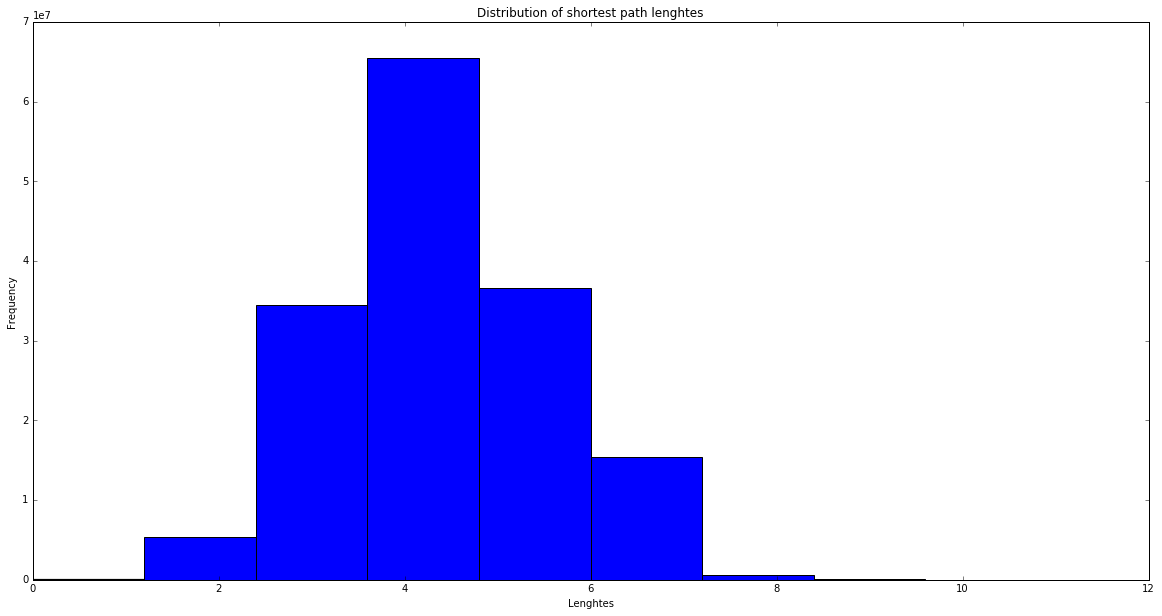

In [7]:
print("computing shortest paths (this takes time)...")
dic = nx.shortest_path_length(G_n1) #dic[ node_1 ][ node_2 ] = dist_btw_1_and_2
print("aggrgating lengthes...")
lenghtes = [] # aggregates path lengthes 
for subdict in dic.values():
    for length in subdict.values():
        lenghtes.append(length)
print("computing plot...")
plt.hist(lenghtes) # plot lenghtes using histogram
plt.title("Distribution of shortest path lenghtes")
plt.xlabel("Lenghtes")
plt.ylabel("Frequency")
plt.show()

#### Exercise 2.5: Network comparison

$1.$ **explore network2**

In [8]:
G_n2 = nx.read_edgelist('../data/network2.csv', delimiter=',', nodetype=int, encoding="utf-8")

In [9]:
num_nodes2 = nx.number_of_nodes(G_n2)
print("# Nodes: ", num_nodes2)

num_edges2 = nx.number_of_edges(G_n2)
print("# Edges: ", num_edges2)

# Nodes:  26542
# Edges:  43516


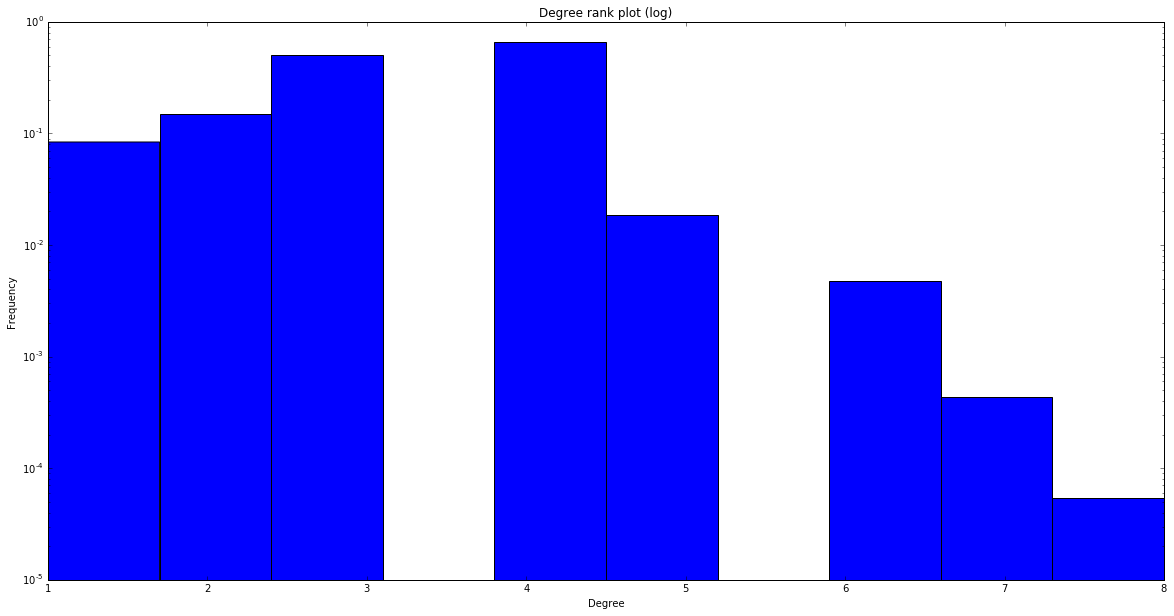

In [10]:
d = list(nx.degree(G_n2).values())
plt.hist(d, log=True, normed=True)
plt.title("Degree rank plot (log)")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

This distribution resembles a poisson distribution. <br>
It has its maximum at 4, and falls off in both directions.

In [11]:
num_conn_comp2 = nx.number_connected_components(G_n2)
print("# Connected Components: ", num_conn_comp2)

max = 0
biggest_component2 = []
for i in nx.connected_components(G_n2):
    if(len(i) > max): 
        max = len(i)
        biggest_component2 = i

print("\nSize of biggest connected component: ", len(biggest_component2))

# Connected Components:  5

Size of biggest connected component:  26481


So yes, there is a giant Component, as there are 26'582 edges and this biggest component contains 26'481 of them, which is a significant fraction. 

computing shortest paths (this takes time)...
aggrgating lengthes...
computing plot...


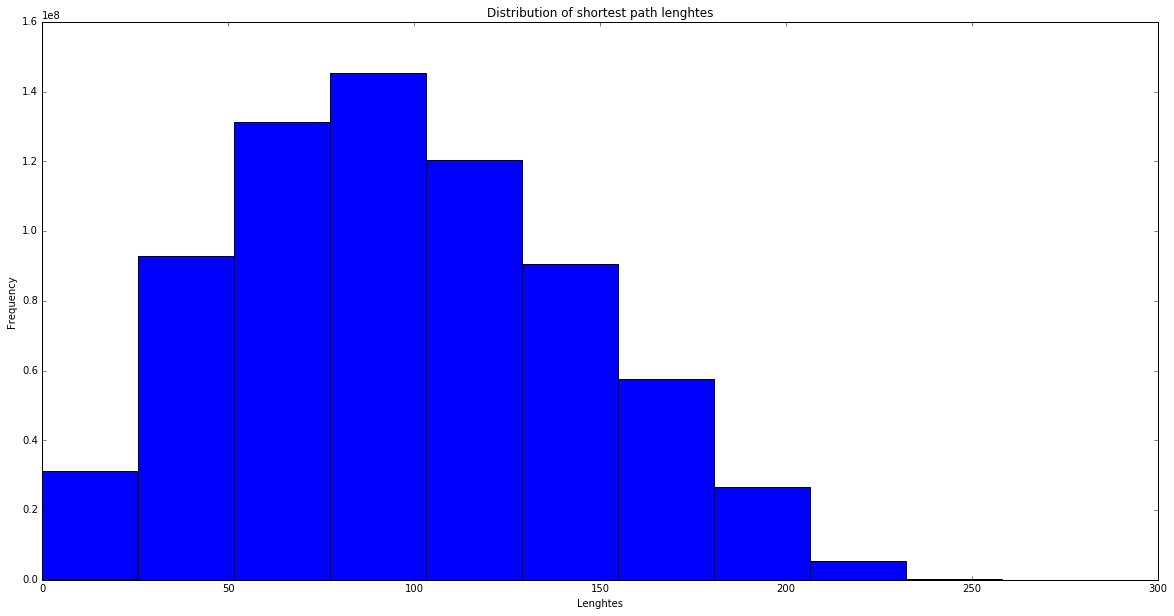

In [12]:
print("computing shortest paths (this takes time)...")
dic = nx.shortest_path_length(G_n2) #dic[ node_1 ][ node_2 ] = dist_btw_1_and_2
print("aggrgating lengthes...")
lenghtes = [] # aggregates path lengthes 
for subdict in dic.values():
    for length in subdict.values():
        lenghtes.append(length)
print("computing plot...")
plt.hist(lenghtes) # plot lenghtes using histogram
plt.title("Distribution of shortest path lenghtes")
plt.xlabel("Lenghtes")
plt.ylabel("Frequency")
plt.show()

As shown in the shortest path length distribution above, nodes in this graph as separated by an average of about 100 degrees of separation. This graph is not a small world.

$2.$ **Differences between network1 and network2** <br>
The degrees are much smaller, however the distances are a lot bigger.

#### Exercise 2.6: Network identification

* The network representing the road network of New York is the second one. <br> 
Clearly it does not make sense to have hundreds of roads at an intersection, which is why the first one cannot be a road network. Also it makes a lot more sense that to get from a point to another far away one, you'd need to traverse lots of intersections, rather than an average of 4.

* The network representing the routers therefore is the first one. <br>
This time it is logical that in a network of routers, any router may have hundreds of connections. Also, as a side effect of that, the distances between routers will be rather short.